In [2]:
from Bio import Phylo
from ete3 import Tree

In [18]:
def get_rates_per_y(group, species_list, time_file, sub_file):
    '''Returns subsitutions rates per year given a group and comma separated species list'''
    
    # Read newick trees
    ##nwk_file = "../data/TimeTree/{}_TimeTree.nwk".format(group)
    ##sub_file = "../data/phylofit/{}_phast.nh".format(group)
    
    time = Tree(time_file, format=1)    
    subr = Tree(sub_file)
    
    # Only keep species present in both trees
    clean_sp_list = list(set(time.get_leaf_names()) & set(subr.get_leaf_names()) & set(species_list))
    for sp in species_list:
        if sp not in clean_sp_list:
            pass
    
    # Keep only species in list, preserving length
    time.prune(clean_sp_list, preserve_branch_length=True)
    subr.prune(clean_sp_list, preserve_branch_length=True)
    
    # Get branch lengths 
    time_d = {n.name:n.dist for n in time.get_leaves()}
    subr_d = {n.name:n.dist for n in subr.get_leaves()}
    
    # Complete info, including yearly rates
    df_l = []
    mod = 1e6 if "Alvarez" not in time_file else 1e8

    for sp in clean_sp_list:
        df_l.append([sp, time_d[sp], subr_d[sp], subr_d[sp]/(time_d[sp]*mod)])
    df = pd.DataFrame(df_l)
    df.columns = ["Species", "Divergence_mya", "Substitution_Rate", "Rate_y"]
        
    return df

Get estimate of subsitution rate per year

In [19]:
with open("9-serpentes.txt") as fh:
    sp_list = [line.strip() for line in fh]

In [22]:
results = get_rates_per_y(group = "snakes", 
                          species_list = sp_list, 
                          time_file = "9-serpentes.TimeTree.nwk", 
                          sub_file  = "9-serpentes-2021-phyloFit.NC_045541.1.noAnc.nh")

Plot

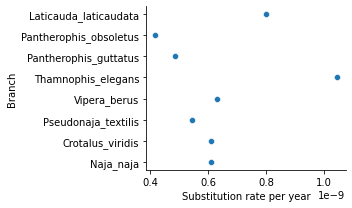

In [37]:
f,ax = plt.subplots(figsize=[5,3])
sns.scatterplot(data=results, x="Rate_y", y="Species")
ax.set_xlabel("Substitution rate per year")
ax.set_ylabel("Branch")
sns.despine()
plt.tight_layout()
plt.savefig("substitution_rate_y.pdf")